In [ ]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [102]:
# columns are age, operation_year, num_nodes,
    # , survival_status
# Note : survival status - 1:patient survived >=5 years
    # 2: patient died within 5 years
# create a dataframe from haberman.csv, we will add header for convenience
df = pd.read_csv("haberman.csv", names=['age','operation_year','num_nodes','survival_status'])


In [103]:
# stats about the data
# 1. shape
print("shape: ",df.shape)

# segregating data based on survival status
df_survived = df.loc[df["survival_status"]==1]
df_died = df.loc[df["survival_status"]==2]

print("--------------------------------------------")
# stats about survived and died
print("number of people survived: ",df_survived.info())
print("--------------------------------------------")
print("number of people died: ",df_died.info())


shape:  (306, 4)
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 303
Data columns (total 4 columns):
age                225 non-null int64
operation_year     225 non-null int64
num_nodes          225 non-null int64
survival_status    225 non-null int64
dtypes: int64(4)
memory usage: 8.8 KB
number of people survived:  None
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 7 to 305
Data columns (total 4 columns):
age                81 non-null int64
operation_year     81 non-null int64
num_nodes          81 non-null int64
survival_status    81 non-null int64
dtypes: int64(4)
memory usage: 3.2 KB
number of people died:  None


In [104]:
# 2. columns
print(df.columns)

print("---------------------------------------------")

# 3. describe the whole dataset ie. Summary Statistics
print(df.describe())

print("---------------------------------------------")
# 4. info about the dataset
print(df.info())

Index(['age', 'operation_year', 'num_nodes', 'survival_status'], dtype='object')
---------------------------------------------
              age  operation_year   num_nodes  survival_status
count  306.000000      306.000000  306.000000       306.000000
mean    52.457516       62.852941    4.026144         1.264706
std     10.803452        3.249405    7.189654         0.441899
min     30.000000       58.000000    0.000000         1.000000
25%     44.000000       60.000000    0.000000         1.000000
50%     52.000000       63.000000    1.000000         1.000000
75%     60.750000       65.750000    4.000000         2.000000
max     83.000000       69.000000   52.000000         2.000000
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
num_nodes          306 non-null int64
survival_status    306 non-null int64
dtyp

Observations: 
1. 4 columns are there ( headers we have given while importing data)
    - age
    - operation_year
    - num_nodes
    - survival_status
2. number of rows / datapoints / observations = 306
3. For all columns 306 points are there, ie. no missing or null values. So no imputation
4. 2 output classes ( 1 and 2) : we will convert it to 0 and 1 for binary classification
    - 1 is survived : 225 people survived
    - 2 is died : 81 people died


In [105]:
# looking at few datapoints
df.head(10)

,age,operation_year,num_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


** Univariate analysis to understand survival rate due a particular independent variable **

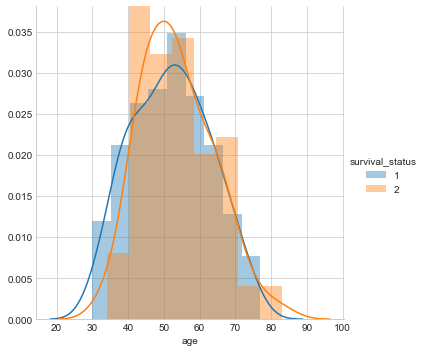

In [106]:
# we will try out distribution plots for all
    # using seaborns distplot

# AGE   
sns.FacetGrid(df, hue="survival_status",size=5) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show()

** **

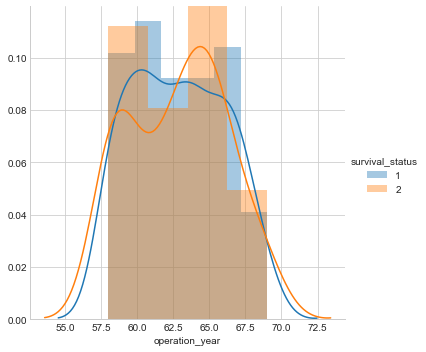

In [107]:
# AGE   
sns.FacetGrid(df, hue="survival_status",size=5) \
    .map(sns.distplot, 'operation_year') \
    .add_legend();
plt.show()

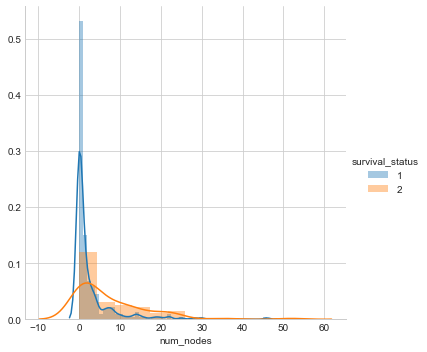

In [108]:
# AGE   
sns.FacetGrid(df, hue="survival_status",size=5) \
    .map(sns.distplot, 'num_nodes') \
    .add_legend();
plt.show()

Observations: 
- Survival status is highly dependent on all the three independent variables
- Still we will try to analyze the dist of data using
    - pdf
    - cdf
    - box plot
    - violin plot

** PDF and CDF for Age column in survived and died sub-dataset**


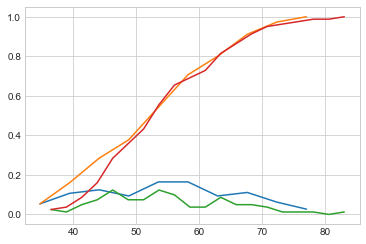

In [109]:
# age
counts, bin_edges = np.histogram(df_survived['age'],bins=10,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)

# operation_year
counts, bin_edges = np.histogram(df_died['age'],bins=20,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

** PDF and CDF for obvervation_year column in survived and died sub-dataset**

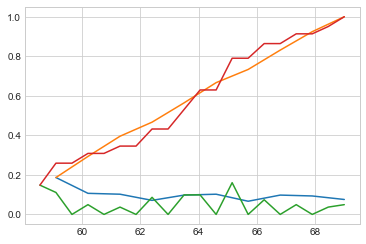

In [110]:
# operation_year
counts, bin_edges = np.histogram(df_survived['operation_year'],bins=10,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(df_died['operation_year'],bins=20,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

** PDF and CDF for num_nodes column in survived and died sub-dataset**

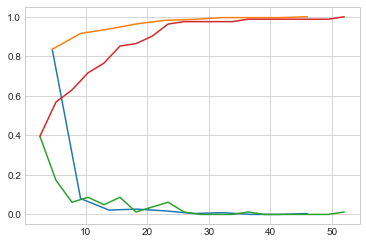

In [111]:
# num_nodes
counts, bin_edges = np.histogram(df_survived['num_nodes'],bins=10,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(df_died['num_nodes'],bins=20,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

- for both operation_year, num_nodes, pdf is abnormal
- lets look at the histogram

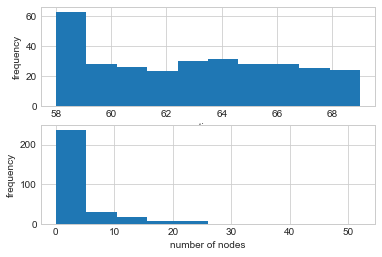

In [112]:
plt.figure(1)

plt.subplot(211)
plt.hist(df.operation_year,bins=10)
plt.xlabel("operation years")
plt.ylabel("frequency")

plt.subplot(212)
plt.hist(df.num_nodes,bins=10)
plt.xlabel("number of nodes")
plt.ylabel("frequency")

plt.show()

Observations
1. From distplot we dont get any clue about seperating the data based on 1 particular column
2. Looking at histograms tells that 
    - number of nodes is positively skewed
    - operation years is of uniform distribution

Still we will look at boxplot and violin plot to complete the univatiate analysis

** box plot **

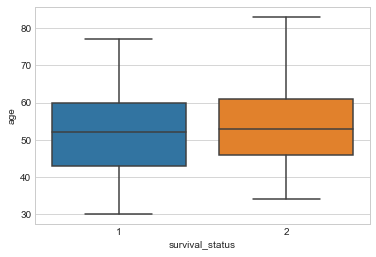

In [113]:
# for age
sns.boxplot(x='survival_status', y ='age', data=df)
plt.show()

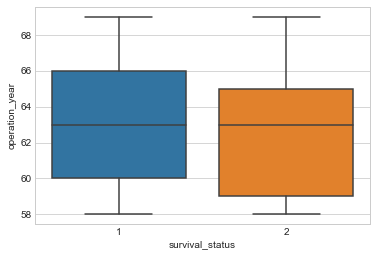

In [114]:
# for operation_year
sns.boxplot(x='survival_status', y ='operation_year', data=df)
plt.show()

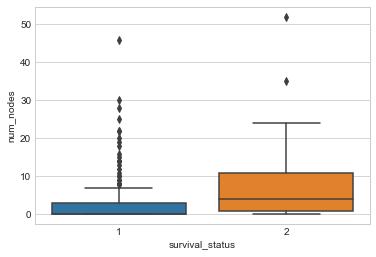

In [115]:
# for num_nodes
sns.boxplot(x='survival_status', y ='num_nodes', data=df)
plt.show()

Observations:
1. for age :
    - distribution is proper, is not skewed
2. for operation_year: 
    - data is skewed for status=2
3. for num_nodes : 
    - data is skewed for both status=1 and 2
    - huge numbers of outliers are present for status =1
    that will give us wrong info in our classification
    

** violin plot**
- we will see the combined behaviour of pdf and boxplot

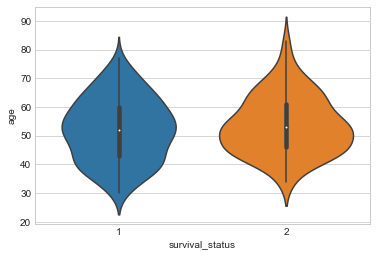

In [116]:
sns.violinplot(x='survival_status',y ='age', data=df,size=8)
plt.show()

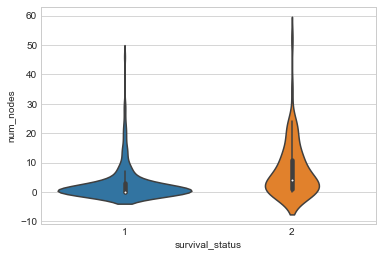

In [117]:
sns.violinplot(x='survival_status',y ='num_nodes', data=df,size=8)
plt.show()

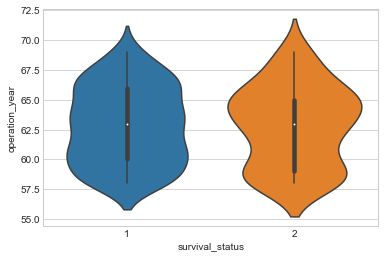

In [118]:
sns.violinplot(x='survival_status',y ='operation_year', data=df,size=8)
plt.show()

Observations
- Similar observations like boxplot
- show the skewed distribution for num_nodes case

## Bivariate analysis
#### Pair plot


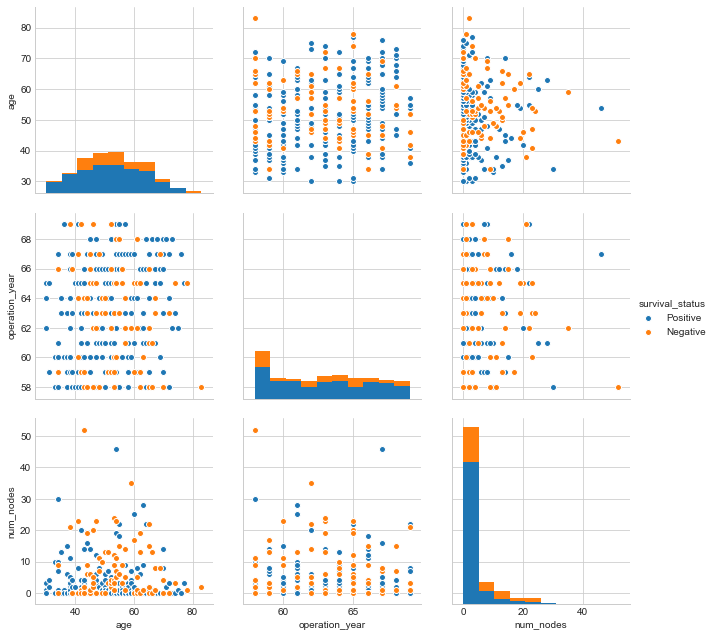

In [123]:
# we are getting 'survived_status' column and row as data is integer
    # so we will make 1 as Positive and 2 as Negative
if '2' in df['survival_status']:
    df['survival_status'] = df['survival_status'].apply(lambda x: 'Positive' if x==1 else 'Negative')
# so that running this block twice wont affect the values

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue='survival_status', size =3)
plt.show()
# thus we get 3c2 = 3 pair of plots

Observation
1. Using Pairplot/scatter plot, we are unable to find some possible seperation in data.

** Results **
1. Using bivariate we were not able to find any independent variable on which we could classify the data
2. same for 2-d pair plots, we were not able to find any seperability condition on all the possible pairs
    of independent variables
3. Maybe in higher dimensions it could be linearly seperable.